In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pan
%matplotlib inline

In [2]:
# Extracts data from file
def get_data(name):
    # Open the first file and read the first two lines
    f=open(name,'r')
    obs = f.readline()
    wlen=f.readline()
    f.close()
    # Saves wavelengths from the second line
    wlen = np.array([float(i) for i in wlen.split(',')[1:]])
    obs_time = obs[12:]
    # Reads the rest of the data
    dat = np.loadtxt(name,skiprows=2,delimiter=',')
    # Saves time and flux data
    time = dat[:,0]
    allflux = dat[:,1:]
    return wlen,allflux,time,obs_time

In [3]:
def get_lightcurve(dat):
    # Load data from file
    wlen,allflux,obs_sec,ot=dat
    # Convert UT time to local time
    hour= float(ot[9:11])
    minute= float(ot[12:14])
    second= float(ot[15:])
    lhour = hour-5
    ltime = lhour+minute/60+second/3600
    obs = np.divide(obs_sec,3600)
    obs = np.add(obs,ltime)
    
    # Derive flux curves from spectra
    
    flux,comp_flux=[],[]
    for inten in allflux:
        #care = np.where((wlen>391)&(wlen<395)) # H line
        care = np.where((wlen>429)&(wlen<431.5)) # G line
        flux.append(sum(inten[care])/(len(wlen[care])))

        #hocare = np.where(((wlen>399)&(wlen<410))|((wlen>380)&(wlen<390))) # Larger comparison window
        #hocare = np.where((wlen>429)&(wlen<431.5)) # Compare to G line
        hocare = np.where(((wlen>425)&(wlen<429))|((wlen>431.5)&(wlen<435))) # Compare around G line
        comp_flux.append(sum(inten[hocare])/(len(wlen[hocare])))
    return obs, flux, comp_flux, ot

## Load Data

In [32]:
filename = 'testflat_observation_10-24-2017_1.dat'
wlen,allinten,obs_sec,ot = get_data(filename)

In [33]:
obs,flux,comp_flux,ot=get_lightcurve([wlen,allinten,obs_sec,ot])

# Play with Data

### Dividing raw light curves

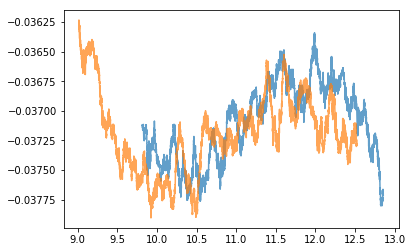

In [35]:
plt.plot(obs,medcomb_flux,alpha=.7)
plt.plot(obs2,medcomb_flux2,alpha=.7)
plt.show()

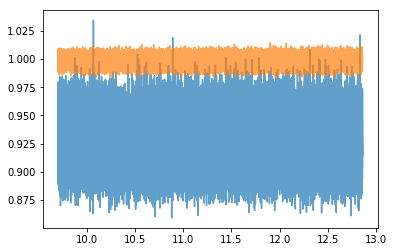

C:\Users\labuser\Anaconda2\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: pd.rolling_median is deprecated for ndarrays and will be removed in a future version
  if sys.path[0] == '':


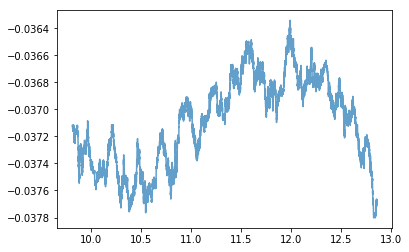

In [34]:
flux = np.array(flux)
comp_flux = np.array(comp_flux)

# Plots the raw light curves
plt.plot(obs,flux,alpha=.7)
plt.plot(obs,comp_flux,alpha=.7)
plt.show()

# Divide target light curve by comparison light curve
div_flux = np.divide(np.subtract(flux,comp_flux),np.add(flux,comp_flux))

medcomb_flux = pan.rolling_median(div_flux,5000)

plt.plot(obs,medcomb_flux,alpha=.7)
plt.show()

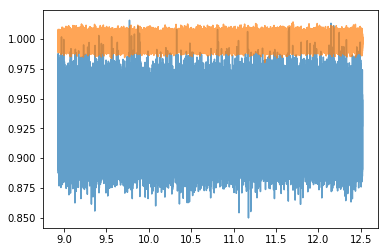

C:\Users\labuser\Anaconda2\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: pd.rolling_median is deprecated for ndarrays and will be removed in a future version
  if sys.path[0] == '':


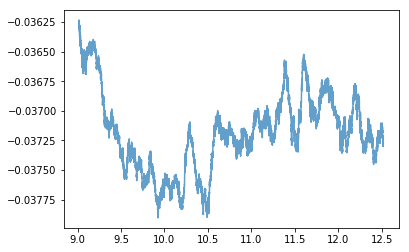

In [31]:
flux = np.array(flux)
comp_flux = np.array(comp_flux)

# Plots the raw light curves
plt.plot(obs2,flux,alpha=.7)
plt.plot(obs2,comp_flux,alpha=.7)
plt.show()

# Divide target light curve by comparison light curve
div_flux = np.divide(np.subtract(flux,comp_flux),np.add(flux,comp_flux))

medcomb_flux2 = pan.rolling_median(div_flux,5000)

plt.plot(obs2,medcomb_flux2,alpha=.7)
plt.show()

In [ ]:
# Divide target light curve by comparison light curve
div1_flux = np.divide(fflux,fcomp_flux)

plt.plot(obs,div1_flux)
plt.show()

h1 = pan.rolling_median(div1_flux,100)
plt.plot(obs,h1)
plt.show()

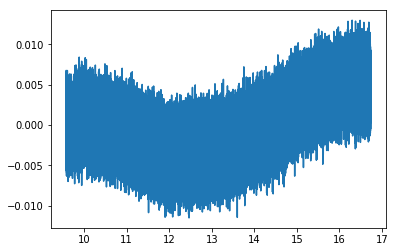

C:\Users\labuser\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: pd.rolling_median is deprecated for ndarrays and will be removed in a future version
  


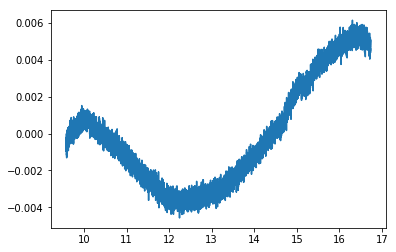

In [53]:
# (x-y)/(x+y)

div2_flux = np.divide(np.subtract(fflux,fcomp_flux),np.add(fflux,fcomp_flux))

plt.plot(obs,div2_flux)
plt.show()

h2= pan.rolling_median(div2_flux,100)
plt.plot(obs,h2)
plt.show()

### Divide raw by polynomial, then divide target by comparison, bin at the very end

In [104]:
# Fit resulting light curve to polynomial
a=np.polyfit(obs,flux,10)
b=np.poly1d(a)
# Divide light curve by fitted polynomial
pflux = np.divide(flux,b(obs))-1

# Fit resulting light curve to polynomial
aa=np.polyfit(obs,comp_flux,10)
bb=np.poly1d(aa)
# Divide light curve by fitted polynomial
comp_pflux = np.divide(comp_flux,bb(obs))-1

plt.plot(obs,flux)
plt.plot(obs,comp_flux)
plt.plot(obs,b(obs))
plt.plot(obs,bb(obs))
plt.xlim(9.4,16.9)
plt.show()

plt.plot(obs,pflux,alpha=.7)
plt.plot(obs,comp_pflux,alpha=.7)
plt.xlim(9.4,16.9)
plt.show()

flat_flux_fun = np.divide(np.add(pflux,1),np.add(comp_pflux,1))
plt.plot(obs,flat_flux_fun)
plt.xlim(9.4,16.9)
plt.show()

h1h = pan.rolling_median(flat_flux_fun,5000)
plt.plot(obs26,h1h26)
plt.plot(obs,h1h)
plt.title('Observation: '+ot)
plt.xlabel('Local Time')
plt.ylabel('Flux')
plt.xlim(9.4,16.9)
plt.show()
#plt.savefig(filename[:-3]+'png')

TypeError: expected x and y to have same length

### Perform same polynomial reduction on light curves that are binned at the beginning

C:\Users\labuser\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_median is deprecated for ndarrays and will be removed in a future version
  """Entry point for launching an IPython kernel.
C:\Users\labuser\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.rolling_median is deprecated for ndarrays and will be removed in a future version
  


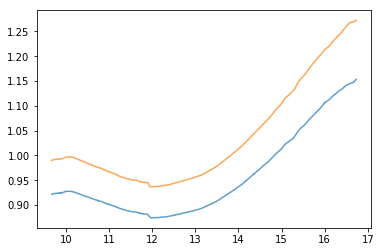

C:\Users\labuser\Anaconda2\lib\site-packages\ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
C:\Users\labuser\Anaconda2\lib\site-packages\ipykernel_launcher.py:23: RankWarning: Polyfit may be poorly conditioned


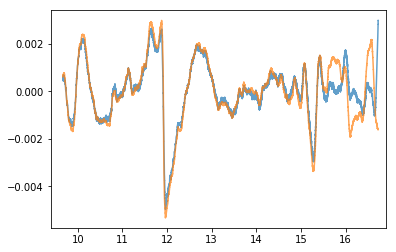

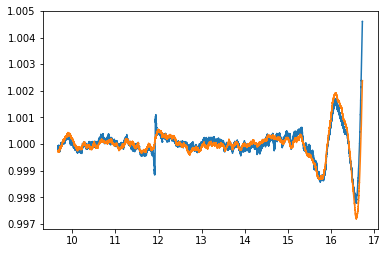

In [87]:
med_flux = pan.rolling_median(np.array(flux),5000)
med_comp_flux = pan.rolling_median(np.array(comp_flux),5000)

nonan = np.where(np.isnan(med_flux)==False)
med_flux = med_flux[nonan]
nobs = obs[nonan]
med_comp_flux = med_comp_flux[nonan]
divcurve = np.divide(newmed_flux,newmed_comp_flux)


# Plots the raw light curves
plt.plot(nobs,med_flux,alpha=.7)
plt.plot(nobs,med_comp_flux,alpha=.7)
plt.show()

# Fit resulting light curve to polynomial
a=np.polyfit(nobs,med_flux,10)
b=np.poly1d(a)
# Divide light curve by fitted polynomial
pflux = np.divide(med_flux,b(nobs))-1

# Fit resulting light curve to polynomial
aa=np.polyfit(nobs,med_comp_flux,10)
bb=np.poly1d(aa)
# Divide light curve by fitted polynomial
comp_pflux = np.divide(med_comp_flux,bb(nobs))-1
#comp_pflux = comp_pflux*.79

plt.plot(nobs,pflux,alpha=.7)
plt.plot(nobs,comp_pflux,alpha=.7)
plt.xlim(9.4,16.9)
plt.show()

divcurve = np.divide(np.add(pflux,1),np.add(comp_pflux,1))

#Compare the resulting divided light curve (blue) to the light curve obtained from binning at the very end
plt.plot(nobs,divcurve)
plt.plot(obs,h1h)
plt.show()